In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [10]:
insurance=pd.read_csv('C:/Users/wb440551/Documents/Graduate/General Assembly_Data Science/In_Class_Activities/Projects/data/insurance.csv')

In [11]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Converting 3 categorical features "sex", "smoker". "region" using LabelEncoder

In [17]:
#duplicating the dataset
df = insurance.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder
#sex
labelencoder_sex = LabelEncoder()
df.sex = labelencoder_sex.fit_transform(df.sex)

In [21]:
#smoker
labelencoder_smoker = LabelEncoder()
df.smoker = labelencoder_smoker.fit_transform(df.smoker)

In [22]:
#region
labelencoder_region = LabelEncoder()
df.region = labelencoder_region.fit_transform(df.region)

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [25]:
#correlation
corrs = df.corr()
corrs['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

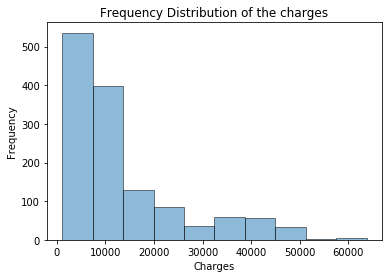

In [26]:
plt.hist(df.charges,bins = 10,alpha=0.5,histtype='bar',ec='black')
plt.title("Frequency Distribution of the charges")
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

## Exploring the data how this affect each attributes to our target "charges"

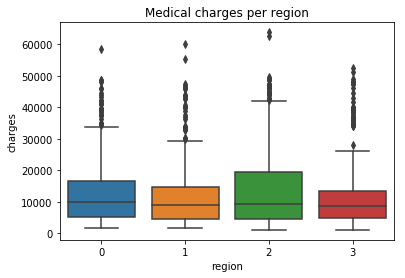

In [33]:
# Charges vs region
sns.boxplot(x=df.region,y=df.charges,data=df)
plt.title("Medical charges per region")
plt.show()

#### as you can see the region doesn't have much impact on medical charges

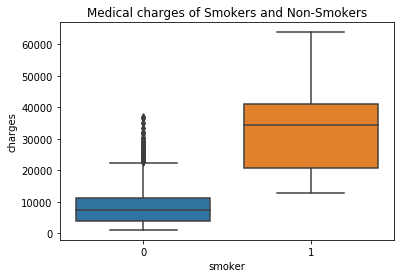

In [34]:
#charges vs smoker
sns.boxplot(x=df.smoker,y=df.charges,data=df)
plt.title("Medical charges of Smokers and Non-Smokers")
plt.show()

#### as you see in the boxplot smokers affects the medical charges of each person

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


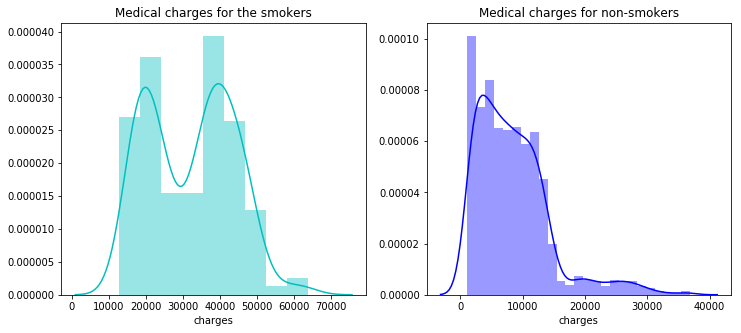

In [35]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
sns.distplot(df[df.smoker==1]['charges'],color='c',ax=ax)
ax.set_title('Medical charges for the smokers')

ax = f.add_subplot(122)
sns.distplot(df[df.smoker==0]['charges'],color='b',ax=ax)
ax.set_title('Medical charges for non-smokers')
plt.show()

##### medical charges for the smokers are higher compare to non-smokers

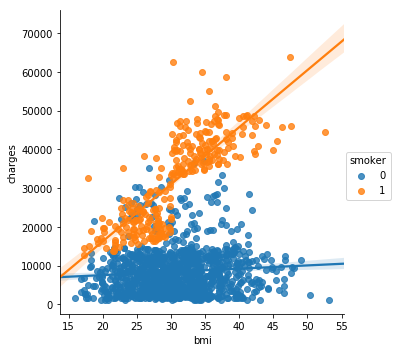

In [37]:
sns.lmplot(x="bmi",y='charges',hue='smoker',data=df)

##### as expected bmi is higher to people who smoke

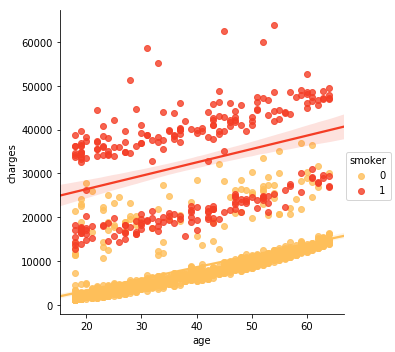

In [43]:
sns.lmplot(x='age',y='charges',hue='smoker', data=df, palette='YlOrRd')

## Build a regression model

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [46]:
#instantiate the sklearn class
lin_model = LinearRegression ()

In [67]:
x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [78]:
from math import sqrt

In [81]:
y_test_pred = lr.predict(x_test)

In [82]:
# RMSE: On average, by how much value are we missing the mark?
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
print('On average, our model errs by ', round(rmse))

On average, our model errs by  5663


In [83]:
# R-squared

print(metrics.r2_score(y_test, y_test_pred))

0.7962732059725786


### Decision Tree model

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
# Decision Tree
treereg = DecisionTreeRegressor()
treereg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [88]:
y_preds=treereg.predict(x_test)

In [89]:
# RMSE: On average, by how much value are we missing the mark?
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
print('On average, our model errs by ', round(rmse))

On average, our model errs by  7152


In [90]:
print(metrics.r2_score(y_test, y_preds))

0.6751242359046665


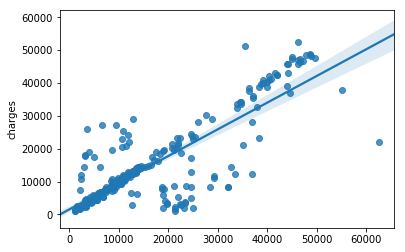

In [91]:
sns.regplot(y_preds, y_test);

In [93]:
feature_cols = ['charges', 'smoker']
treereg.fit(x,y)
pd.DataFrame(list(zip(feature_cols,treereg.feature_importances_)))

,0,1
0,charges,0.123142
1,smoker,0.008901


In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [102]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3729516.375, MSE test data: 19951615.324
R2 train data: 0.974, R2 test data: 0.873


In [104]:
x = df.drop(['charges','region'], axis = 1)
y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(x_train,y_train)

y_train_pred = plr.predict(x_train)
y_test_pred = plr.predict(x_test)

print(plr.score(x_test,y_test))

0.13856451696404848


In [106]:
# pickle your model!
import pickle
filename = open('insurance_model.pkl', 'wb')
pickle.dump(lin_model, filename)
filename.close()

In [107]:
# pickle your model!
import pickle
filename = open('dectree_model.pkl', 'wb')
pickle.dump(treereg, filename)
filename.close()

In [108]:
# pickle your model!
import pickle
filename = open('random_model.pkl', 'wb')
pickle.dump(forest , filename)
filename.close()